Using Colab cache for faster access to the 'brain-tumor-classification-mri' dataset.
Data source import complete.


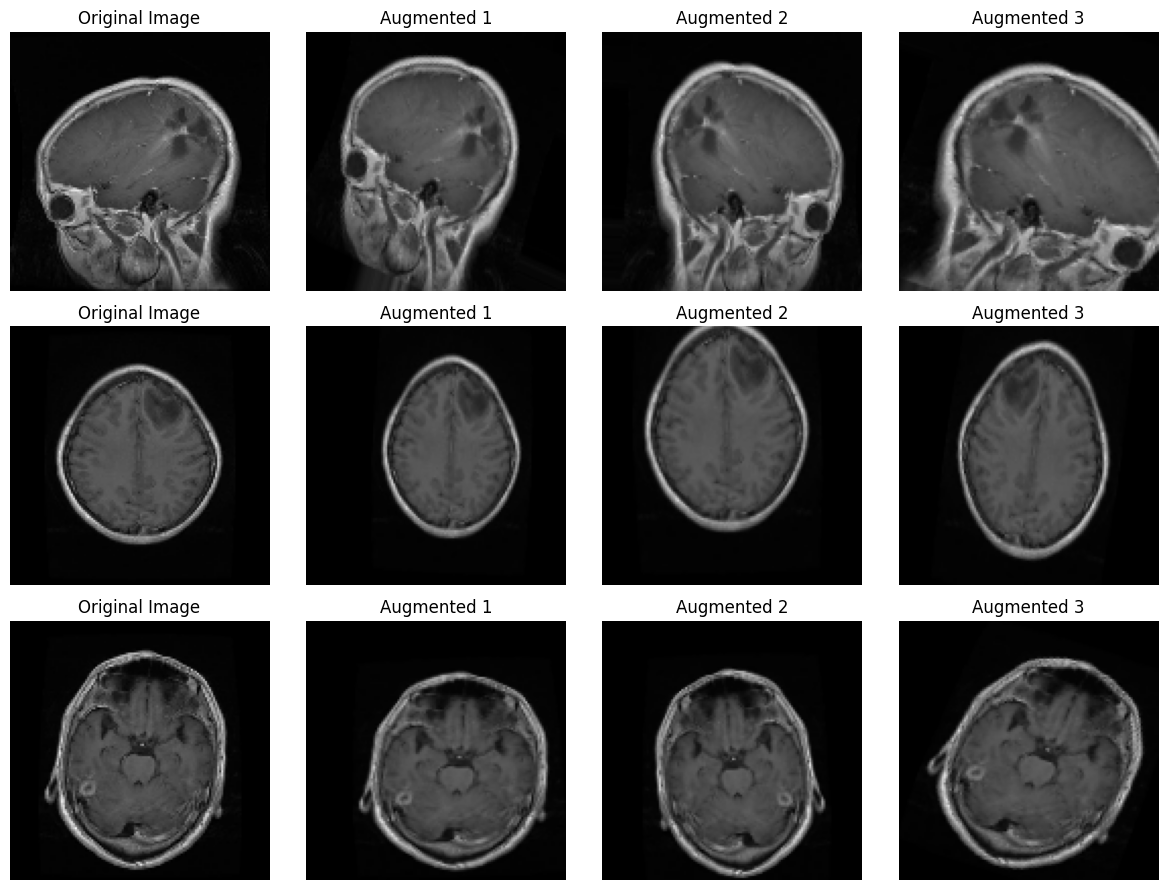

In [3]:
# ========================
# 1. Import Dataset
# ========================
import kagglehub
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Download dataset
sartajbhuvaji_brain_tumor_classification_mri_path = kagglehub.dataset_download(
    'sartajbhuvaji/brain-tumor-classification-mri'
)
print('Data source import complete.')

# ========================
# 2. Define Paths
# ========================
train_dir = os.path.join(sartajbhuvaji_brain_tumor_classification_mri_path, "Training")

# Pick a class folder (e.g., glioma_tumor) for visualization
glioma_folder = os.path.join(train_dir, "glioma_tumor")
sample_images = [os.path.join(glioma_folder, img) for img in os.listdir(glioma_folder)[:5]]

# ========================
# 3. Data Augmentation Setup
# ========================
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ========================
# 4. Visualization Function
# ========================
def visualize_augmented_images(image_generator, sample_paths, num_augmented_images=3):
    augmented_images = []

    for path in sample_paths:
        img = load_img(path, target_size=(128, 128))  # Resize for consistency
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)  # Keras expects batch format

        # Store original + augmented versions
        augmented_samples = [np.array(img)] # Convert PIL Image to NumPy array
        for _ in range(num_augmented_images):
            aug_img = image_generator.random_transform(x[0])  # Apply augmentation
            augmented_samples.append(aug_img.astype(np.uint8))
        augmented_images.append(augmented_samples)

    # Plot results
    fig, axes = plt.subplots(len(sample_paths), num_augmented_images + 1, figsize=(12, len(sample_paths) * 3))
    for i, sample_set in enumerate(augmented_images):
        for j, image in enumerate(sample_set):
            axes[i, j].imshow(image) # astype(np.uint8) is not needed for numpy arrays
            if j == 0:
                axes[i, j].set_title('Original Image')
            else:
                axes[i, j].set_title(f'Augmented {j}')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# ========================
# 5. Run Visualization
# ========================
visualize_augmented_images(datagen, sample_images[:3], num_augmented_images=3)